In [55]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
pwd

'C:\\Users\\jaklo'

In [57]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]=wb.DataReader(a, data_source='yahoo', start='2013-12-31')['Adj Close']
    

In [58]:
pf_data.head(5)

,WMT,FB,BP
Date,,,
2013-12-31,68.045013,54.650002,33.575596
2014-01-02,68.235268,54.709999,33.140453
2014-01-03,68.010452,54.560001,33.064468
2014-01-06,67.629967,57.200001,33.154270
2014-01-07,67.837509,57.919998,33.534153


In [59]:
pf_data.tail(5)

,WMT,FB,BP
Date,,,
2019-11-15,118.870003,195.100006,39.209999
2019-11-18,120.250000,197.399994,39.060001
2019-11-19,119.889999,199.320007,38.650002
2019-11-20,119.129997,197.509995,38.509998
2019-11-21,119.860001,197.929993,38.590000


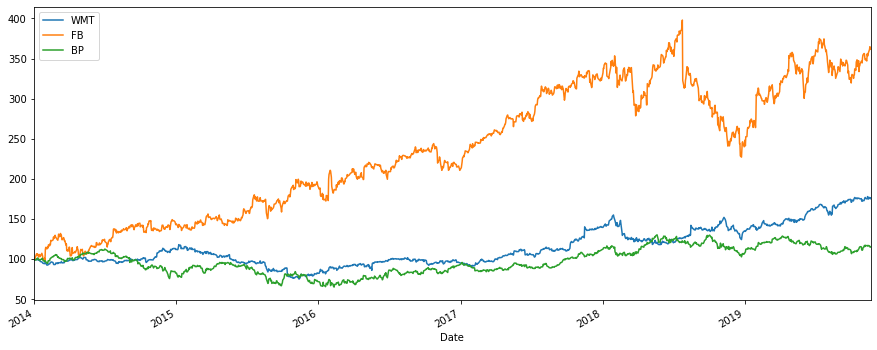

In [60]:
#normalize to 100
(pf_data/pf_data.iloc[0]*100).plot(figsize=(15,6));

In [61]:
#Get log returns
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns.tail(5)

,WMT,FB,BP
Date,,,
2019-11-15,-0.014863,0.010045,0.005883
2019-11-18,0.011542,0.011720,-0.003833
2019-11-19,-0.002998,0.009680,-0.010552
2019-11-20,-0.006359,-0.009122,-0.003629
2019-11-21,0.006109,0.002124,0.002075


In [62]:
#Get log returns annual
log_returns.mean()*250

WMT    0.095377
FB     0.216807
BP     0.023449
dtype: float64

In [63]:
#Get log returns covariance
log_returns.cov()*250

,WMT,FB,BP
WMT,0.035043,0.008742,0.007021
FB,0.008742,0.088220,0.016386
BP,0.007021,0.016386,0.051297


In [64]:
#Get log returns correlation
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.157226,0.165599
FB,0.157226,1.000000,0.243585
BP,0.165599,0.243585,1.000000


## Expected Portfolio Variance:

In [65]:
num_assets = len(assets)
num_assets

3

In [66]:
weights = np.random.random(num_assets)

In [67]:
weights /= np.sum(weights)

In [68]:
weights[0]+weights[1]+weights[2]

1.0

In [69]:
Exp_var = np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
Exp_var

0.03104327945413782

## Expected Portfolio Return:

In [70]:
Exp_return = np.sum(weights*log_returns.mean())*250
Exp_return

0.05654482210821681

## Expected Portfolio Volatility:


In [71]:
Exp_vol = np.sqrt(Exp_var)
Exp_vol

0.17619103113989038

In [76]:
#Creating arrays for 1000 combination of assets returns and volatility

pfolio_returns =[]
pfolio_vol=[]

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_vol = np.array(pfolio_vol)

pfolio_returns, pfolio_vol

(array([0.076687  , 0.07996406, 0.1224658 , 0.09292308, 0.11660281,
        0.13880567, 0.15677084, 0.13121009, 0.13470015, 0.06949611,
        0.11655473, 0.12220959, 0.09377956, 0.0836392 , 0.0918008 ,
        0.10187078, 0.0859391 , 0.0925824 , 0.10986933, 0.07806992,
        0.09829843, 0.12960994, 0.09641934, 0.13400504, 0.1207255 ,
        0.11607596, 0.12326977, 0.16063137, 0.06680595, 0.09943717,
        0.10544236, 0.07470467, 0.09629471, 0.09251815, 0.13962652,
        0.11388426, 0.12940547, 0.13224063, 0.07752639, 0.1325902 ,
        0.13780281, 0.18312453, 0.1120885 , 0.13964525, 0.12605314,
        0.0954769 , 0.08069087, 0.10476159, 0.13276543, 0.14984855,
        0.10854792, 0.11959695, 0.07372727, 0.12134407, 0.13702881,
        0.13633322, 0.11923567, 0.08890304, 0.1743128 , 0.1107196 ,
        0.09316637, 0.1070285 , 0.12841466, 0.1054283 , 0.09426846,
        0.07511875, 0.137627  , 0.1366955 , 0.11356001, 0.0778038 ,
        0.14892738, 0.09487436, 0.11131169, 0.14

In [77]:
#Graphing Efficient Fortier Curve - O Lord, Let this be good!
portfolio = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_vol})

portfolio.tail(5)

,Return,Volatility
995,0.105407,0.154055
996,0.077885,0.158814
997,0.098453,0.153754
998,0.120109,0.171598
999,0.091577,0.149756


Text(0, 0.5, 'Return')

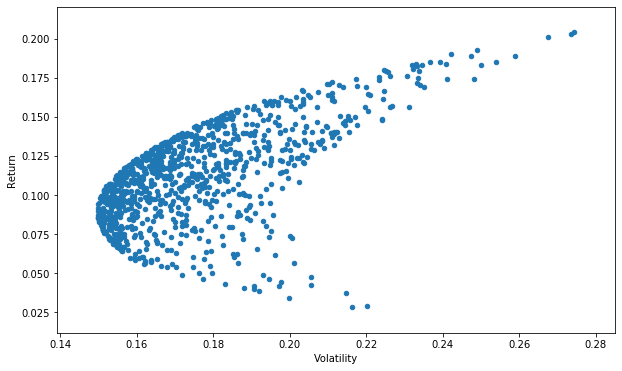

In [78]:
portfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Volatility')
plt.ylabel('Return')